In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

** STEP 1: Import Libraries & Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/tomato-reviews/zomato.csv")
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [3]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


** STEP 2: Data Cleaning**

**Delete redundant columns**

In [8]:
columns_to_drop = ['url', 'address', 'phone', 'menu_item', 'dish_liked']

# Keep only the columns that exist in the dataframe
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop them
df.drop(columns=existing_columns, axis=1, inplace=True)


**Rename columns for simplicity**

In [9]:
df.rename(columns={'approx_cost(for two people)': 'cost',
                   'listed_in(type)': 'service_type',
                   'listed_in(city)': 'city'}, inplace=True)


**Drop duplicates**

In [10]:
df.drop_duplicates(inplace=True)

Clean individual columns
Remove ‘₹’, commas in cost

In [14]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',', '')).astype(float)


In [15]:
df['rate'] = df['rate'].astype(str)  # Convert to string
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].astype(float)


 Remove NaN values

In [16]:
df.dropna(inplace=True)


Encode categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])


** STEP 3: Data Visualization**

** Restaurants delivering Online or Not**

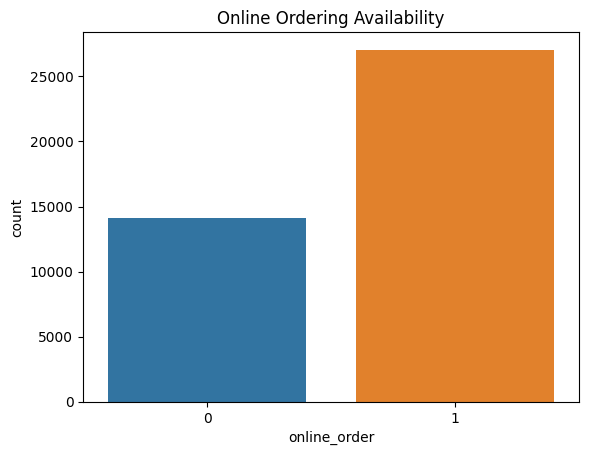

In [18]:
sns.countplot(x='online_order', data=df)
plt.title("Online Ordering Availability")
plt.show()


** Restaurants allowing table booking or not**

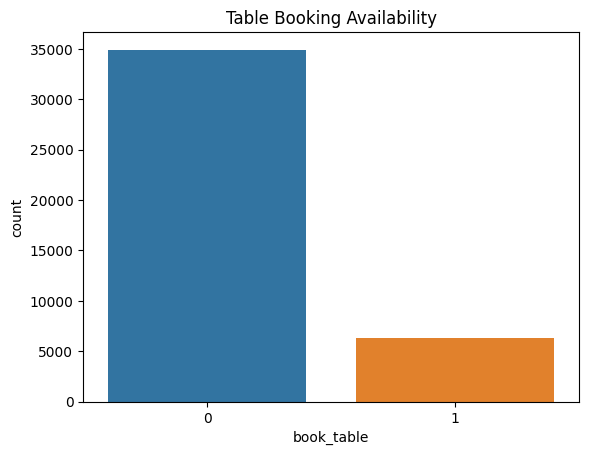

In [19]:
sns.countplot(x='book_table', data=df)
plt.title("Table Booking Availability")
plt.show()


** Table Booking Rate vs Rate**

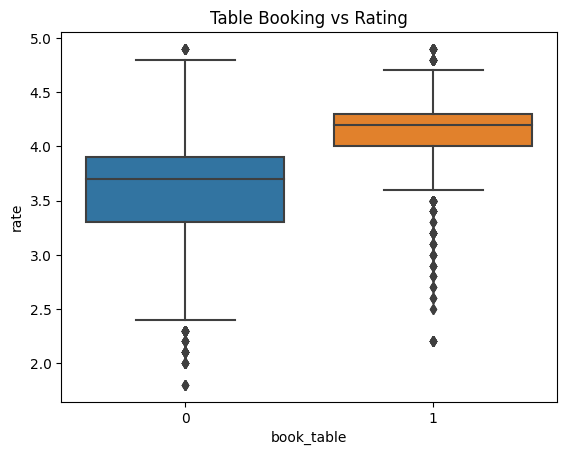

In [20]:
sns.boxplot(x='book_table', y='rate', data=df)
plt.title("Table Booking vs Rating")
plt.show()


** Best Location**

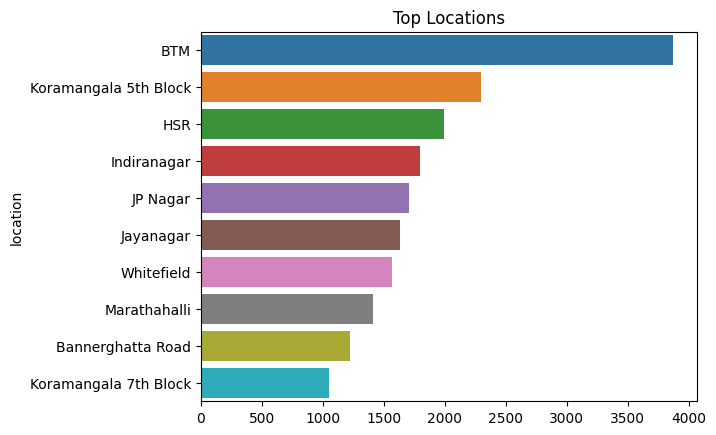

In [21]:
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top Locations")
plt.show()


**Location vs Rating**

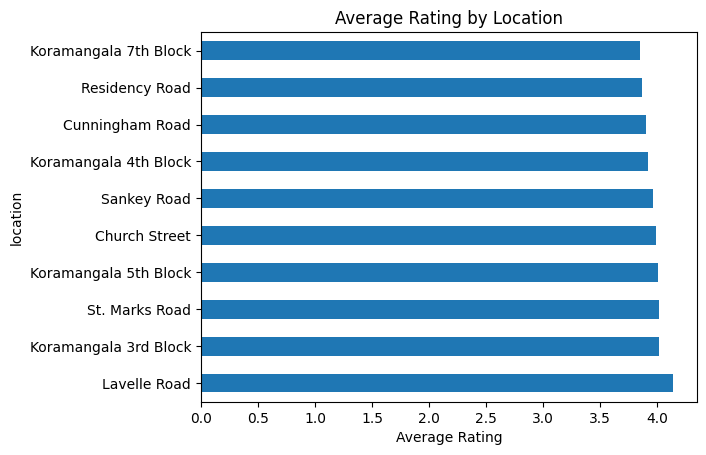

In [22]:
loc_ratings = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)
loc_ratings.plot(kind='barh', title='Average Rating by Location')
plt.xlabel("Average Rating")
plt.show()


** Restaurant Type Distribution**

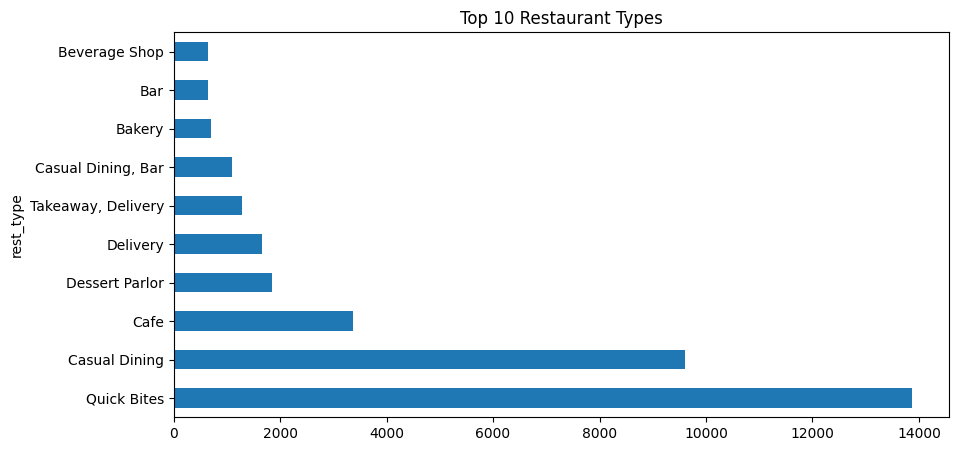

In [23]:
plt.figure(figsize=(10,5))
df['rest_type'].value_counts()[:10].plot(kind='barh')
plt.title("Top 10 Restaurant Types")
plt.show()


**Restaurant Type vs Rating**

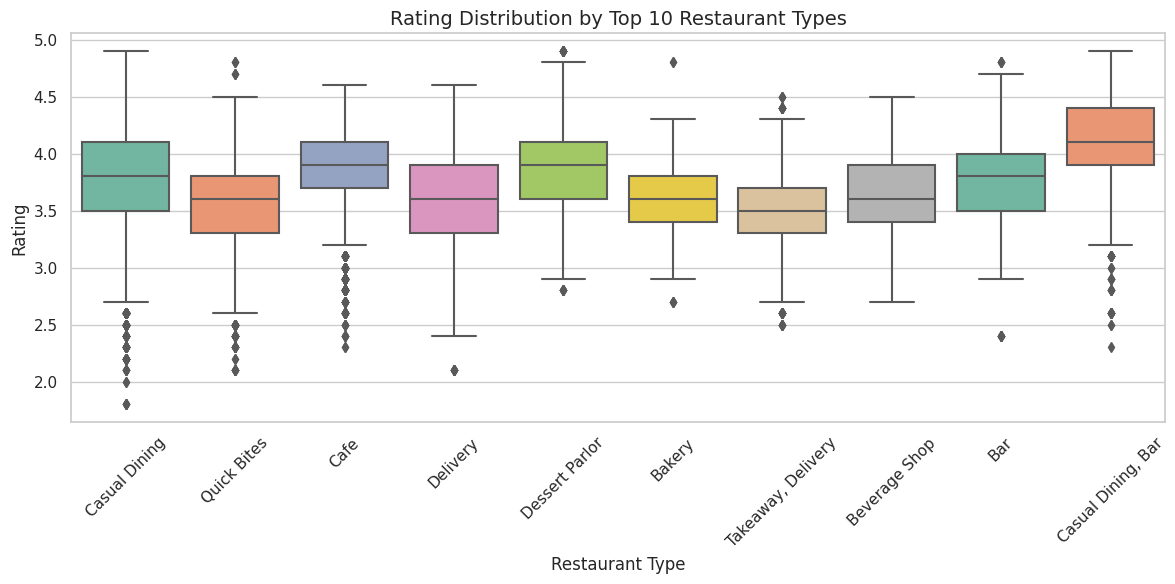

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 restaurant types by count
top_rest_types = df['rest_type'].value_counts().nlargest(10).index

# Filter the DataFrame
df_top_rest = df[df['rest_type'].isin(top_rest_types)]

# Set the style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create boxplot
sns.boxplot(x='rest_type', y='rate', data=df_top_rest, palette='Set2')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and axis labels
plt.title("Rating Distribution by Top 10 Restaurant Types", fontsize=14)
plt.xlabel("Restaurant Type", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.tight_layout()
plt.show()


** Types of Services**

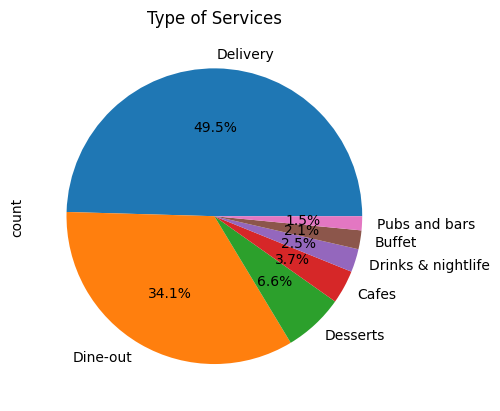

In [25]:
df['service_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Type of Services")
plt.show()


**Type vs Rating**

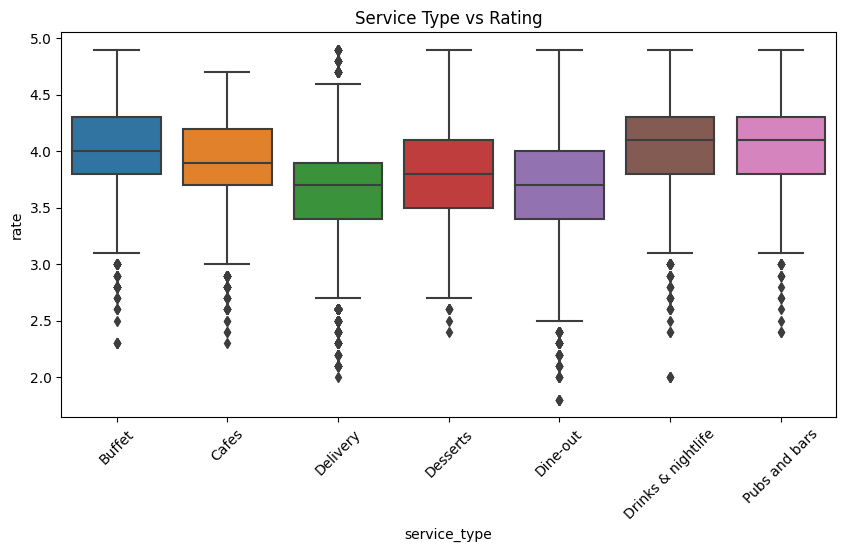

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='service_type', y='rate', data=df)
plt.title("Service Type vs Rating")
plt.xticks(rotation=45)
plt.show()


**Cost vs Rating Visualization**

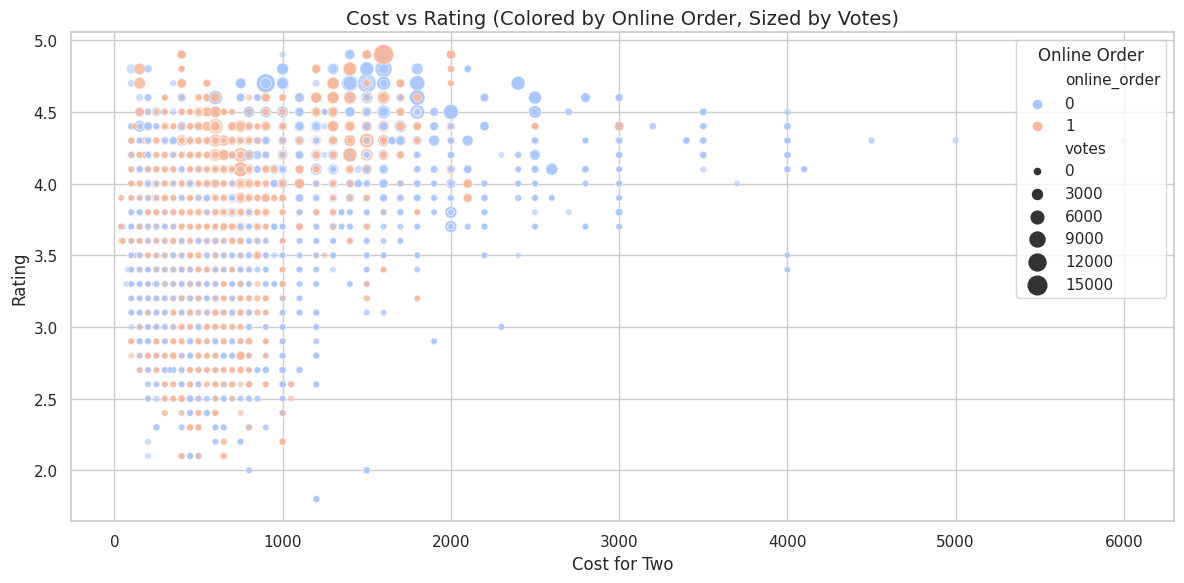

In [31]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Enhanced scatterplot
sns.scatterplot(
    x='cost',
    y='rate',
    data=df,
    hue='online_order',          # Color based on online ordering
    size='votes',                # Size based on votes
    alpha=0.6,                   # Transparency for overlapping points
    palette='coolwarm',
    sizes=(20, 200)
)

plt.title("Cost vs Rating (Colored by Online Order, Sized by Votes)", fontsize=14)
plt.xlabel("Cost for Two", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend(title='Online Order', loc='upper right')
plt.tight_layout()
plt.show()


**No. of Restaurants per Location**

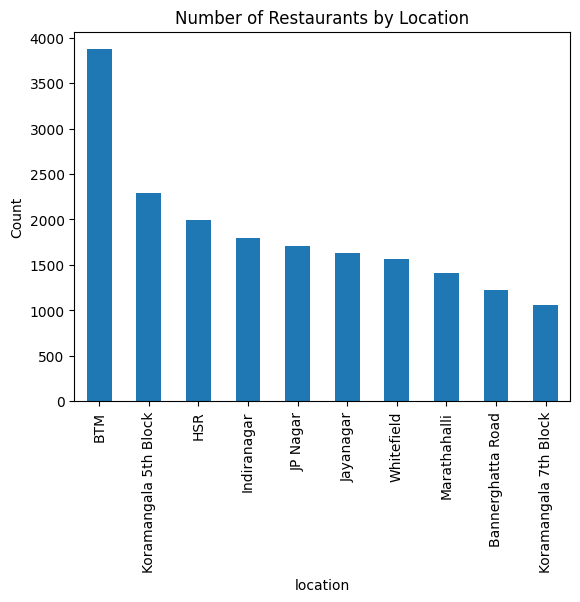

In [28]:
df['location'].value_counts()[:10].plot(kind='bar')
plt.title("Number of Restaurants by Location")
plt.ylabel("Count")
plt.show()


**Most Famous Restaurant Chains**

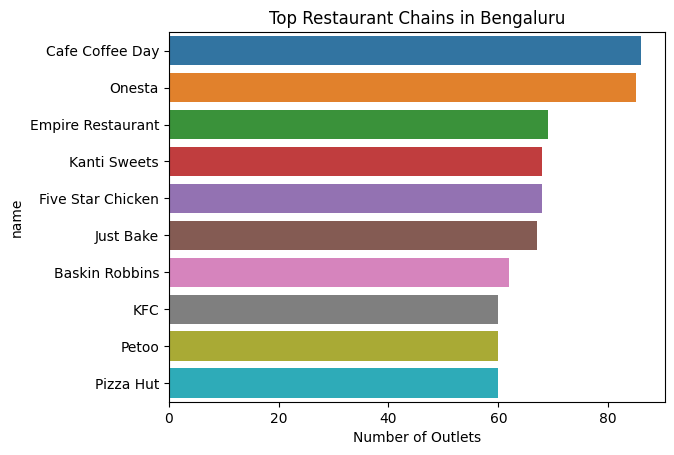

In [29]:
chains = df['name'].value_counts().head(10)
sns.barplot(y=chains.index, x=chains.values)
plt.title("Top Restaurant Chains in Bengaluru")
plt.xlabel("Number of Outlets")
plt.show()


** STEP 4: Regression Analysis**

Preprocessing for Regression

In [34]:
# Select features
df_model = df[['online_order', 'book_table', 'rate', 'votes', 'cost']]
df_model = df_model.dropna()

# Features and Target
X = df_model[['online_order', 'book_table', 'votes', 'cost']]
y = df_model['rate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Linear Regression R² Score:", lr.score(X_test, y_test))


Linear Regression R² Score: 0.29024249552432757
